In [800]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [891]:
import pandas as pd

# Cargar los datos desde el archivo CSV
df = pd.read_csv("train.csv")

# Asegurarse de que la columna 'date' está en formato datetime
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S")

# Transformar la columna 'consumption' a int
df['consumption'] = df['consumption'].round().astype(int)


# Filtrar por la subestación 'AJAHUEL'
df_subEstacion_ = df[df['substation'] == 'AJAHUEL']

# Filtrar por un día, mes y año específico (puedes descomentar según lo que necesites)
dia_especifico = 1
mes_especifico = 1  
año_especifico = 2018

# df_subEstacion_ = df_subEstacion_[
#     (df_subEstacion_['date'].dt.year == año_especifico) 
#     #& (df_subEstacion['date'].dt.month == mes_especifico) 
#     #& (df_subEstacion['date'].dt.day == dia_especifico)
# ]

# Establecer la columna 'date' como índice
df_subEstacion_ = df_subEstacion_.set_index("date")

# Asegurarse de que solo estamos operando con la columna 'consumption'
df_subEstacion_ = df_subEstacion_[['consumption']]

# # Calcular el promedio diario
# daily_avg = df_subEstacion_.resample('D').mean()
# daily_avg.index = pd.to_datetime(daily_avg.index).strftime('%Y-%m-%d')

# print("Promedio Diario:")
# print(daily_avg)

# # Calcular el promedio horario
# hourly_avg = df_subEstacion_.resample('H').mean()
# print("\nPromedio Horario:")
# print(hourly_avg)

# # Calcular el promedio semanal
# weekly_avg = df_subEstacion_.resample('W').mean()
# print("\nPromedio Semanal:")
# print(weekly_avg)

# Calcular el promedio mensual
monthly_avg = df_subEstacion_.resample('M').mean().round().astype(int)

monthly_avg.index = monthly_avg.index.strftime('%Y-%m')

# Imprimir el resultado
print(monthly_avg)


# Seleccionamos como variable de investigacion:
df_subEstacion = monthly_avg


         consumption
date                
2018-01          139
2018-02          118
2018-03          149
2018-04          161
2018-05          179
2018-06          203
2018-07          215
2018-08          197
2018-09          169
2018-10          191
2018-11          157
2018-12          119
2019-01          118
2019-02          108
2019-03          139
2019-04          138
2019-05          170
2019-06          208
2019-07          204
2019-08          200
2019-09          168
2019-10          161
2019-11          139
2019-12          135
2020-01          125
2020-02          122
2020-03          135
2020-04          143
2020-05          158
2020-06          172
2020-07          196
2020-08          177
2020-09          150
2020-10          143
2020-11          129
2020-12          120
2021-01          120
2021-02          118
2021-03          136
2021-04          155
2021-05          168
2021-06          187
2021-07          193
2021-08          200
2021-09          188
2021-10      

In [893]:
# Calcular el IQR (Rango Intercuartílico) para la columna 'consumption'
Q1 = df['consumption'].quantile(0.25)
Q3 = df['consumption'].quantile(0.75)

print(Q1)
print(Q3)

IQR = Q3 - Q1

# Definir los límites superior e inferior para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los valores atípicos
outliers = df[(df['consumption'] < lower_bound) | (df['consumption'] > upper_bound)]

print(outliers)

0.0
262.0
       substation                date  consumption
107893     CNAVIA 2018-05-12 23:00:00          752
112156     CNAVIA 2018-11-06 15:00:00          658
112157     CNAVIA 2018-11-06 16:00:00          659
112180     CNAVIA 2018-11-07 15:00:00          667
112181     CNAVIA 2018-11-07 16:00:00          674
...           ...                 ...          ...
158828    ELSALTO 2020-03-10 15:00:00          666
158829    ELSALTO 2020-03-10 16:00:00          667
158854    ELSALTO 2020-03-11 17:00:00          657
159436    ELSALTO 2020-04-04 23:00:00          750
168042    ELSALTO 2021-04-03 23:00:00          726

[156 rows x 3 columns]


In [894]:
# Calcular la media del consumo
mean_consumption = df_subEstacion['consumption'].mean()

# Reemplazar los valores atípicos por la media
df_subEstacion['consumption'] = np.where((df_subEstacion['consumption'] < lower_bound) | (df_subEstacion['consumption'] > upper_bound),
                             mean_consumption.round().astype(int),  # Reemplaza con la media
                             df_subEstacion['consumption'].round().astype(int))  # Mantén el valor original si no es outlier

# Verificar los datos después del reemplazo
print(df_subEstacion)


         consumption
date                
2018-01          139
2018-02          118
2018-03          149
2018-04          161
2018-05          179
2018-06          203
2018-07          215
2018-08          197
2018-09          169
2018-10          191
2018-11          157
2018-12          119
2019-01          118
2019-02          108
2019-03          139
2019-04          138
2019-05          170
2019-06          208
2019-07          204
2019-08          200
2019-09          168
2019-10          161
2019-11          139
2019-12          135
2020-01          125
2020-02          122
2020-03          135
2020-04          143
2020-05          158
2020-06          172
2020-07          196
2020-08          177
2020-09          150
2020-10          143
2020-11          129
2020-12          120
2021-01          120
2021-02          118
2021-03          136
2021-04          155
2021-05          168
2021-06          187
2021-07          193
2021-08          200
2021-09          188
2021-10      

In [895]:
# Calcular medidas estadísticas para la columna 'consumption'
mean_consumption = df_subEstacion['consumption'].mean()
median_consumption = df_subEstacion['consumption'].median()
std_dev_consumption = df_subEstacion['consumption'].std()
percentiles_consumption = df_subEstacion['consumption'].quantile([0.25, 0.5, 0.75])

# Crear un DataFrame para mostrar los resultados
statistics = pd.DataFrame({
    'Mean': [mean_consumption],
    'Median': [median_consumption],
    'Standard Deviation': [std_dev_consumption],
    '25 Percentile': [percentiles_consumption[0.25]],
    '50 Percentile (Median)': [percentiles_consumption[0.5]],
    '75 Percentile': [percentiles_consumption[0.75]]
})

# # Mostrar las estadísticas calculadas
#import ace_tools as tools; tools.display_dataframe_to_user(name="Consumption Statistics", dataframe=statistics)
print(statistics)

      Mean  Median  Standard Deviation  25 Percentile  50 Percentile (Median)  \
0  157.375   156.0           29.791206          135.0                   156.0   

   75 Percentile  
0          181.0  


In [896]:
##x=np.asarray([i for i in range(1,21)])
x = np.arange(len(df_subEstacion))  # Crear un array con índices desde 0 hasta el tamaño del DataFrame


In [897]:
#y=np.round(np.sin(x*np.pi/3),2)
y = df_subEstacion['consumption'].values  # Obtener los valores de consumo como un array de NumPy

In [902]:
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
[139 118 149 161 179 203 215 197 169 191 157 119 118 108 139 138 170 208
 204 200 168 161 139 135 125 122 135 143 158 172 196 177 150 143 129 120
 120 118 136 155 168 187 193 200 188 166 130 138]


In [903]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

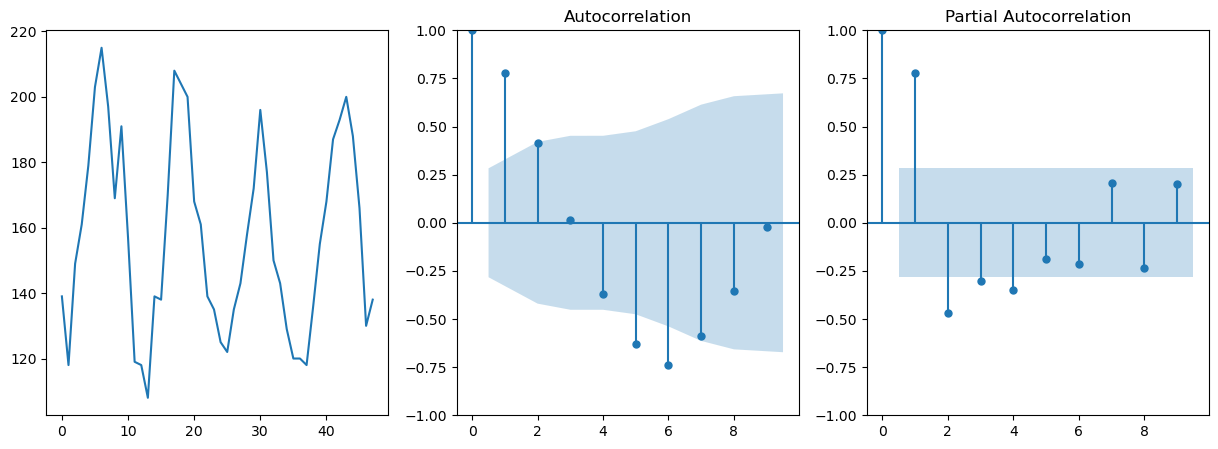

In [905]:
fig, axes =plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(x,y)
plot_acf(y,lags=9,ax=axes[1]);
plot_pacf(y,lags=9,ax=axes[2]);



H0: Serie no estacionaria
HA: Serie estacionaria (p<0.05)

In [906]:
from statsmodels.tsa.stattools import adfuller

# serie de tiempo ['consumption'])
result = adfuller(y, maxlag=1)

# Imprimir resultados del test ADF
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Decisión sobre la estacionariedad
if result[1] < 0.05 and result[0] < result[4]['5%']:
    print("\nLa serie es estacionaria, ya que el p-value es menor que 0.05 ")
    print("Puedes utilizar el modelo ARMA, ya que la serie es estacionaria.")
else:
    print("\nLa serie NO es estacionaria, ya que el p-value es mayor que 0.05 ")
    print("Debes utilizar el modelo ARIMA, ya que la serie no es estacionaria.")


ADF Statistic: -3.758468
p-value: 0.003362
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602

La serie es estacionaria, ya que el p-value es menor que 0.05 
Puedes utilizar el modelo ARMA, ya que la serie es estacionaria.


In [907]:
from statsmodels.tsa.arima.model import ARIMA

In [974]:
from numpy import log
y_log = log(y)
modelo = ARIMA(y_log, order=(2, 0, 7))
predictor = modelo.fit(method_kwargs={"maxiter":500})
# Imprimir los resultados
print("MSE:", predictor.mse)
print(predictor.summary())

MSE: 0.0065855782355491764
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(2, 0, 7)   Log Likelihood                  55.948
Date:                Thu, 26 Sep 2024   AIC                            -89.896
Time:                        17:20:33   BIC                            -69.313
Sample:                             0   HQIC                           -82.117
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0473      0.023    217.736      0.000       5.002       5.093
ar.L1          1.7283      0.009    194.635      0.000       1.711       1.746
ar.L2         -1.0000    

c:\Users\salo_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [971]:
x_p=[i+len(x)+1 for i in range(len(x))]

In [972]:
modelo_pred=predictor.get_forecast(steps=len(y))
modelo_ci=modelo_pred.conf_int(0.05)

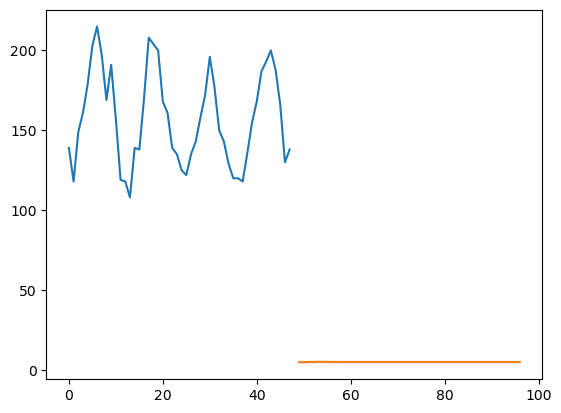

In [973]:
plt.plot(x,y,x_p,modelo_pred.predicted_mean)
plt.fill_between(x_p,modelo_ci[:,0],modelo_ci[:,1],color="b",alpha=.15)

In [981]:
modelo2 = ARIMA(y, order=(2, 0, 5))
predictor2 = modelo2.fit(method_kwargs={"maxiter":500})
print("MSE", predictor2.mse) 
predictor2.summary()


MSE 155.76326478798472


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(2, 0, 5)   Log Likelihood                -186.908
Date:                Thu, 26 Sep 2024   AIC                            391.815
Time:                        17:57:57   BIC                            408.656
Sample:                             0   HQIC                           398.180
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        158.0765      3.376     46.829      0.000     151.460     164.693
ar.L1          1.7287      0.010    170.413      0.000       1.709       1.749
ar.L2         -0.9999      0.007   -143.209      0.000      -1.014      -0.986
ma.L1         -1.2082     20.604     -0.059      0.953     -41.591      39.174
ma.L2          0.0404     30.743      0.001      0.999     -60.215      60.296
ma.L3          1.0579     18.533      0.057      0.954     -35.267      37.383
ma.L4         -0.7831      8.344     -0.094      0.925     -17.137      15.571
ma.L5          0.4076      0.280      1.456      0.145      -0.141       0.956
sigma2       111.2193      1.254     88.727      0.000     108.762     113.676
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.49
Prob(Q):                              0.96   Prob(JB):                         0.47
Heteroskedasticity (H):               0.54   Skew:                             0.36
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.17e+19. Standard errors may be unstable.
"""

In [982]:
modelo_pred2=predictor2.get_forecast(steps=len(y))
modelo_ci2=modelo_pred2.conf_int(0.05)

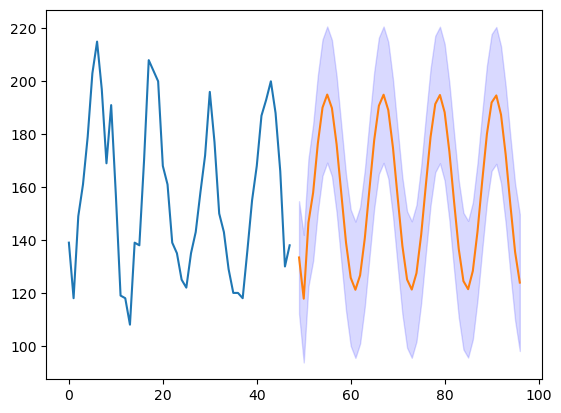

In [983]:
plt.plot(x,y,x_p,modelo_pred2.predicted_mean)
plt.fill_between(x_p,modelo_ci2[:,0],modelo_ci2[:,1],color="b",alpha=.15)

In [988]:
modelo3 = ARIMA(y, order=(2, 0, 7))
predictor3 = modelo3.fit()
print("MSE", predictor3.mse) 
predictor3.summary()

c:\Users\salo_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE 171.76147328176054


c:\Users\salo_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(2, 0, 7)   Log Likelihood                -189.382
Date:                Thu, 26 Sep 2024   AIC                            400.765
Time:                        21:02:25   BIC                            421.348
Sample:                             0   HQIC                           408.543
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        158.6597      6.312     25.136      0.000     146.289     171.031
ar.L1          1.6901      0.066     25.583      0.000       1.561       1.820
ar.L2         -0.9538      0.070    -13.626      0.000      -1.091      -0.817
ma.L1         -0.8931     26.069     -0.034      0.973     -51.987      50.201
ma.L2          0.1457     49.535      0.003      0.998     -96.942      97.233
ma.L3          0.5936     54.841      0.011      0.991    -106.892     108.079
ma.L4         -0.5291     39.659     -0.013      0.989     -78.259      77.201
ma.L5          0.2180     24.571      0.009      0.993     -47.941      48.377
ma.L6         -0.1539     18.515     -0.008      0.993     -36.443      36.136
ma.L7          0.5409     15.482      0.035      0.972     -29.803      30.885
sigma2       123.9033   3511.208      0.035      0.972   -6757.937    7005.744
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.64   Prob(JB):                         0.63
Heteroskedasticity (H):               0.47   Skew:                             0.33
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [989]:
modelo_pred3=predictor3.get_forecast(steps=len(y))
modelo_ci3=modelo_pred3.conf_int(0.05)

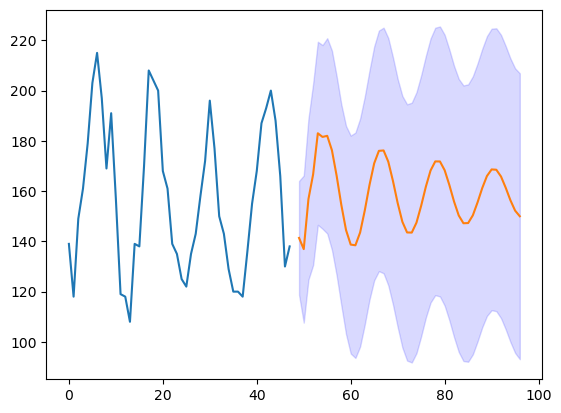

In [991]:
plt.plot(x,y,x_p,modelo_pred3.predicted_mean)
plt.fill_between(x_p,modelo_ci3[:,0],modelo_ci3[:,1],color="b",alpha=.15)